
Henrique Olo Bardeja 81815270

Gabriel cardoso da silva 818136132

Iuri Moura da Silva 818143167

Wagner Alves de Melo 818137692

Lucas Venceslau dos Santos Soares 818221111

Danilo Yuudi Hirata 819228171

[[0 0 0 ... 1 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 1 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 1 0 0]]


ValueError: ignored

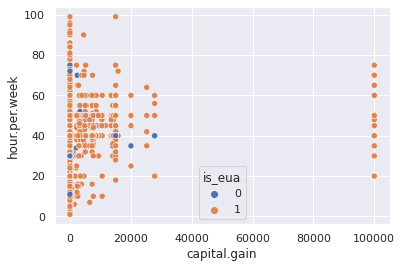

In [177]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

df = pd.read_csv('census.csv')
df = df[(df.astype(str) != ' ?').all(axis=1)]
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

native_country = le.fit_transform(df['native.country'])
education = le.fit_transform(df['education'])
workclass = le.fit_transform(df['workclass'])
marital = le.fit_transform(df['marital.status'])
occupation = le.fit_transform(df['occupation'])
relationship = le.fit_transform(df['relationship'])
race = le.fit_transform(df['race'])
sex = le.fit_transform(df['sex'])
income = le.fit_transform(df['income'])

df['education'] = education
df['workclass'] = workclass
df['marital.status'] = marital
df['occupation'] = occupation
df['relationship'] = relationship
df['race'] = race
df['sex'] = sex
df['income'] = income
df['is_eua'] = df.apply(lambda row: 1 if 'United-States'in row['native.country'] else 0, axis=1)
df.dtypes

unique = len(native)

arrTst = list(range(0, len(native.columns)+1))

X = df
X = X[['capital.gain', 'hour.per.week']]
X
y = pd.Categorical.from_codes(native_country,arrTst)
y = pd.get_dummies(y, drop_first=True)
y 

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_pred

sns.scatterplot(
x='capital.gain',
y='hour.per.week',
hue=df['is_eua'],
data=X_test.join(y_test, how='outer')
)
plt.scatter(
X_test['capital.gain'],
X_test['hour.per.week'],
c=y_pred,
cmap='coolwarm',
alpha=0.7
)
confusion_matrix(y_test, y_pred)